#<h1><font color='green'><center>**Books Recommendation System**</center></h1>


---

#<font size="+2" color='violet'><b> Problem Statement </b></font>

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).
Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from
competitors.

The main objective is to create a book recommendation system for users.


---

#<font size="+2" color='violet'><b> Understanding the Data </b></font>

The Book-Crossing dataset comprises 3 files:

● Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

● Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

● Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

---

#<font size="+2" color='violet'><b> Project Workflow </b></font>

1. Importing Libraries

2. Loading the Dataset

3. Data Cleaning

4. Feature Engineering

5. EDA

6. Building Recommender System

# **1. Importing Libraries**

In [2]:
# Ignoring all warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.api.types import is_numeric_dtype
import re
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

In [3]:
# Mounting drive to colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading the data sets
ratings = pd.read_csv('/content/drive/MyDrive/Book Recommandation/Ratings.csv')
users  = pd.read_csv('/content/drive/MyDrive/Book Recommandation/Users.csv')
books = pd.read_csv('/content/drive/MyDrive/Book Recommandation/Books.csv')

In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


# **1. Preliminary Analysis**

### A) Removing the Duplicates in the Books Data Frame Before Mergeing

## Books dataset

In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [9]:
# Checking duplicate records from books
books[books.duplicated()].sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: object

In [10]:
books.shape

(271360, 8)

In [11]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

## ratings dataset

In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [13]:
# Checking duplicate records
ratings[ratings.duplicated()].sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: object

In [14]:
ratings.shape

(1149780, 3)

In [15]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

## users dataset

In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [17]:
users[users.duplicated()].sum()

User-ID       0
Location      0
Age         0.0
dtype: object

In [18]:
users.shape

(278858, 3)

In [19]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

Age Column has 110762 null values

Processing Age column before merging all theree data sets as it has 110762 null values

In [20]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

As Age column has values ranging from 0 years to 244 years.It is highly unlikely for users to be of age above 100 years. So we will fill users with age above 90 with mean value of the age column.

In [21]:
users.loc[(users.Age > 90) | (users.Age < 5)] = np.nan
users['Age'].fillna((users['Age'].mean()), inplace = True)
users['Age'] = users['Age'].astype('int64')
users.Age.unique()

array([34, 18, 17, 61, 26, 14, 25, 19, 46, 55, 32, 24, 20, 23, 51, 31, 21,
       44, 30, 57, 43, 37, 41, 54, 42, 50, 39, 53, 47, 36, 28, 35, 13, 58,
       49, 38, 45, 62, 63, 27, 33, 29, 66, 40, 15, 60, 79, 22, 16, 65, 59,
       48, 72, 56, 67, 80, 52, 69, 71, 73, 78,  9, 64, 12, 74, 75, 76, 83,
       68, 11, 77, 70,  8,  7, 81, 10,  5,  6, 84, 82, 90, 85, 86, 87, 89,
       88])


# <font color='white'> **Merging of all three DataSet into One**

In [22]:
# Merging all three datasets (Users, Books and ratings)
data = pd.merge(ratings,books, on='ISBN', how = 'inner')
data = pd.merge(data, users, on = 'User-ID', how='inner')
data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",34
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa",23
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa",23
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa",23


In [23]:
data.shape

(1026157, 12)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026157 entries, 0 to 1026156
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1026157 non-null  int64 
 1   ISBN                 1026157 non-null  object
 2   Book-Rating          1026157 non-null  int64 
 3   Book-Title           1026157 non-null  object
 4   Book-Author          1026155 non-null  object
 5   Year-Of-Publication  1026157 non-null  object
 6   Publisher            1026155 non-null  object
 7   Image-URL-S          1026157 non-null  object
 8   Image-URL-M          1026157 non-null  object
 9   Image-URL-L          1026153 non-null  object
 10  Location             1026157 non-null  object
 11  Age                  1026157 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 93.9+ MB


## Now Lets analyse each column in data one by one

In [25]:
print(sorted(data['User-ID'].unique()))

[2, 8, 9, 10, 12, 14, 16, 17, 19, 20, 22, 23, 26, 32, 36, 39, 42, 44, 51, 53, 56, 64, 67, 68, 69, 70, 73, 75, 77, 78, 79, 81, 82, 83, 85, 86, 87, 88, 91, 92, 95, 97, 99, 102, 107, 109, 110, 114, 125, 129, 132, 133, 135, 139, 141, 144, 151, 160, 162, 165, 169, 176, 178, 183, 185, 190, 193, 199, 202, 204, 207, 212, 215, 217, 224, 226, 228, 230, 232, 236, 237, 241, 242, 243, 244, 247, 250, 254, 256, 257, 272, 273, 278, 280, 289, 291, 300, 302, 306, 310, 311, 313, 323, 326, 327, 332, 334, 337, 338, 339, 343, 345, 356, 361, 362, 367, 372, 376, 383, 384, 387, 388, 392, 393, 400, 406, 408, 413, 422, 424, 430, 431, 432, 433, 435, 439, 440, 441, 444, 446, 447, 453, 460, 463, 469, 472, 475, 476, 479, 483, 486, 487, 489, 493, 494, 496, 499, 500, 501, 503, 505, 507, 508, 512, 513, 516, 523, 530, 537, 538, 542, 547, 558, 559, 565, 566, 567, 569, 585, 592, 595, 596, 602, 618, 619, 620, 625, 626, 628, 638, 639, 640, 641, 643, 645, 649, 650, 651, 657, 660, 677, 683, 685, 695, 698, 701, 705, 707, 708, 

In [26]:
data['User-ID'].value_counts()

User-ID
11676     11144
198711     6456
153662     5814
98391      5779
35859      5646
          ...  
170999        1
26237         1
136099        1
176341        1
276660        1
Name: count, Length: 91699, dtype: int64

In [27]:
data['User-ID'].isnull().sum()

0

### User-ID column seems to be Okay as if now,  lets Analyse Age column.

In [28]:
print(sorted(data.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 89, 90]


In [29]:
# Creating bins for age column
bins = [4,12,20,50,91]
labels = ['kids', 'Teenager', 'Adult', 'Old']
data['Age-Bins'] = pd.cut(x=data['Age'], bins = bins, labels=labels)

<Axes: xlabel='Age', ylabel='Density'>

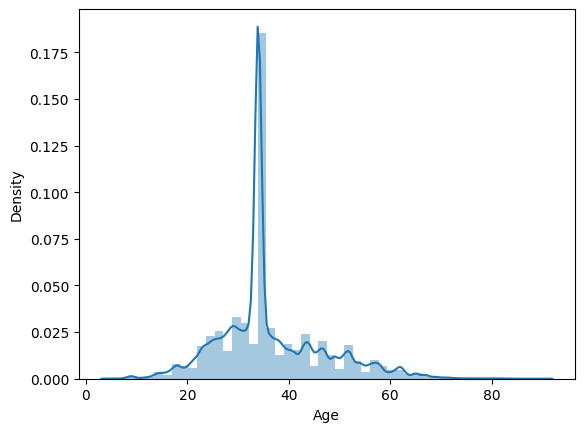

In [30]:
# Distplot for Age
sns.distplot(data['Age'])

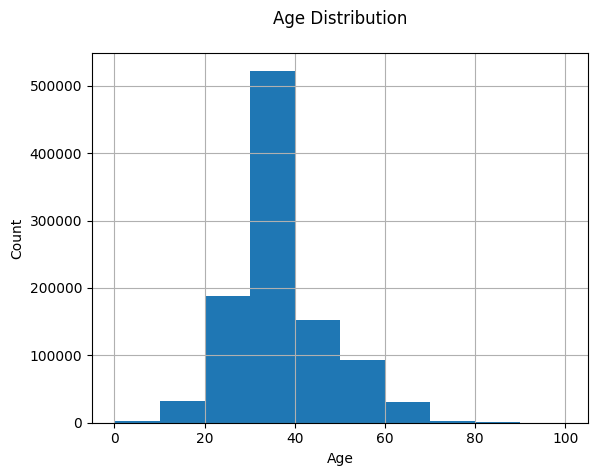

In [31]:
# Age Distribution
data.Age.hist(bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Most of the users are of age between 20 and 40 years.

### Location Column

In [32]:
data.Location.unique()

array(['tyler, texas, usa', 'cincinnati, ohio, usa',
       'strafford, missouri, usa', ...,
       'shoreham-by-sea, , united kingdom', 'ccp, ccp, chile',
       'stuttgart, \\n/a\\"., germany"'], dtype=object)

In [33]:
data.Location

0                         tyler, texas, usa
1                     cincinnati, ohio, usa
2                     cincinnati, ohio, usa
3                     cincinnati, ohio, usa
4                     cincinnati, ohio, usa
                         ...               
1026152         genève, genève, switzerland
1026153        stuttgart, \n/a\"., germany"
1026154    arlington heights, illinois, usa
1026155    arlington heights, illinois, usa
1026156           singapore, n/a, singapore
Name: Location, Length: 1026157, dtype: object

In [34]:
# Lets create a Country column from Location
for i in data:
  data['Country'] = data.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [35]:
data.Country.nunique()

224

As now we have country column, hence removing the Location Column.

In [36]:
# Dropping Location column
data.drop('Location', inplace=True, axis=1)

In [37]:
data.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age,Age-Bins,Country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,34,Adult,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,23,Adult,usa


In [38]:
data['Country'] = data['Country'].astype('str')

In [39]:
data['Country'].unique()

array(['usa', '', 'malaysia', 'australia', 'nan', 'canada', 'new zealand',
       'germany', 'united kingdom', 'us', 'croatia', 'france', 'portugal',
       'netherlands', 'brazil', 'cyprus', 'denmark', 'spain', 'japan',
       'austria', 'romania', 'china', 'italy', 'switzerland', 'bermuda',
       'saudi arabia', 'mexico', 'philippines', 'sri lanka', 'sweden',
       'antarctica', 'k1c7b1', 'finland', 'iran', 'israel', 'singapore',
       'ireland', 'catalunya', 'argentina', 'dominican republic',
       'south korea', 'quit', 'india', 'greece', 'luxembourg', 'ghana',
       'slovenia', 'poland', 'phillipines', 'belgium', 'bulgaria',
       'south africa', 'tajikistan', 'alderney', 'czech republic',
       'united state', 'framingham', 'qatar', 'grenada', 'hong kong',
       'italia', 'costa rica', 'cayman islands', 'maricopa', 'chile',
       'kuwait', 'turkey', 'norway', 'peru', 'belize', 'indonesia',
       'pakistan', 'taiwan', 'burkina faso', 'rwanda', 'yugoslavia',
       'latvi

In [40]:
# replacing Improper names with valid country name
data['Country'].replace(['','quit','ua','ysa', 'lkjlj', 'k1c7b1','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us','tdzimi','x','c'],
                           ['other','other','uae','usa','usa','usa','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa','usa','usa','usa'],inplace=True)

Text(0.5, 1.0, 'Count of users Country wise')

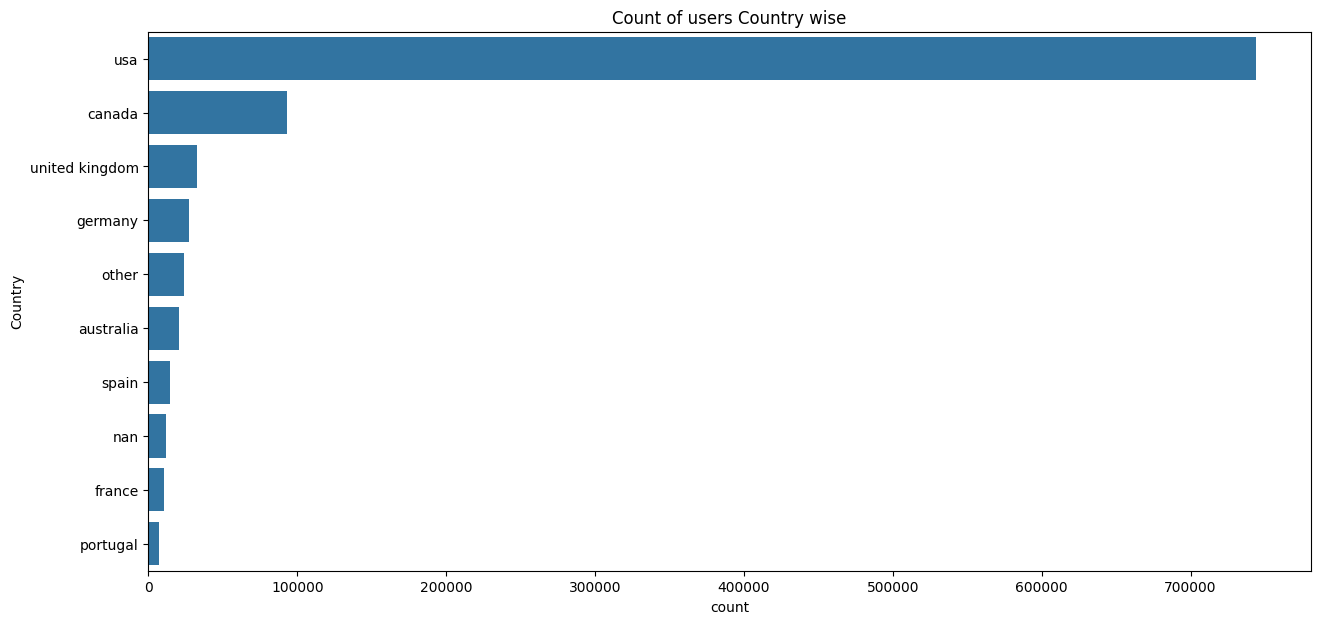

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(y='Country', data=data,order = pd.value_counts(data['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

Most Users are from USA.

In [42]:
data.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L', 'Age', 'Age-Bins', 'Country'],
      dtype='object')

### ISBN column

In [43]:
data.head(3)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age,Age-Bins,Country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,34,Adult,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,23,Adult,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,23,Adult,usa


In [44]:
# Checking datatype of ratings
print(is_numeric_dtype(data['Book-Rating']))

True


In [45]:
# Also checking datatype of User-ID is numeric or not
print(is_numeric_dtype(data['User-ID']))

True


In [46]:
# Checking ISBN
flag = 0
k = []
reg = "[^A-Za-z0-9]"

for i in data['ISBN']:
  z = re.search(reg, i)
  if z:
    flag=1

if flag == 1:
  print('False')
else:
  print('True')

False


In [47]:
## Uppercasing all alphabets in ISBN
ratings['ISBN'] = ratings['ISBN'].str.upper()

In [48]:
data.loc[data['ISBN'].str.endswith('X')].head(3)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age,Age-Bins,Country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,34,Adult,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,23,Adult,usa
31,2313,080901548X,0,The Dark Child : The Autobiography of an Afric...,Camara Laye,1954,"Farrar, Straus and Giroux",http://images.amazon.com/images/P/080901548X.0...,http://images.amazon.com/images/P/080901548X.0...,http://images.amazon.com/images/P/080901548X.0...,23,Adult,usa


Book-Author and Publisher Column

In [49]:
# Treating Null values in Book-Author and Publisher column
data[['Book-Author','Publisher']].isnull().sum()

Book-Author    2
Publisher      2
dtype: int64

In [50]:
data.loc[data['Book-Author'].isnull(),:]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age,Age-Bins,Country
398333,63714,0751352497,10,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,29,Adult,united kingdom
484496,98647,9627982032,8,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,26,Adult,malaysia


In [51]:
data.at[398333, 'Book-Author'] = 'Other'
data.at[484496, 'Book-Author'] = 'Other'

In [52]:
data.loc[data['Publisher'].isnull(),:]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age,Age-Bins,Country
9752,98391,193169656X,9,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,52,Old,usa
9761,98391,1931696993,9,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,52,Old,usa


In [53]:
data.at[9752, 'Publisher'] = 'Other'
data.at[9761, 'Publisher'] = 'Other'

In [54]:
data[['Book-Author','Publisher']].isnull().sum()

Book-Author    0
Publisher      0
dtype: int64

### As we see there are no more null values in Book-Author and Publisher column

## Year-Of-Publication, Book-Author, Book-Title, Publisher Columns

In [55]:
data['Year-Of-Publication'].unique()

array([2002, 1986, 1994, 1996, 1998, 2001, 1987, 1984, 1997, 1970, 1978,
       1993, 1989, 1995, 1990, 1992, 1950, 1991, 1999, 1954, 1988, 2003,
       2004, 2000, 1983, 1985, 1982, 1956, 1979, '2003', 1975, 0, 1976,
       1981, 1977, 1980, 1974, 1957, 1958, 1960, 1963, 1969, 1972, 1961,
       1971, 1953, 1968, 1973, 1967, 1962, 1937, 1959, '1998', '1981',
       '0', '1979', '1993', '1994', '1992', '1978', '1989', '1999',
       '1987', '1988', '1995', '1991', '1996', '2000', '1976', '2001',
       '2002', '1983', '1997', '1986', '1985', 1955, 1946, '2004', 2005,
       '1971', '1984', '1980', '1982', '1990', '1957', 1945, 1965, '1950',
       1964, '1964', '1970', '1969', '1960', '1956', '1977', '1973', 1927,
       2020, '1968', 2050, '1972', '1975', '1974', 1920, 1966, 1952,
       '1965', '1963', 1930, '1962', '1952', 1940, '1967', 1942, 1947,
       1925, '1966', 1948, '1958', 1923, 2030, 1951, 2021, 1941, 1932,
       '1961', 2011, '1951', 1901, 2038, '1940', 1929, 1943, 1936

In [56]:
pd.set_option('display.max_colwidth', None)

In [57]:
data.loc[data['Year-Of-Publication'] == 'DK Publishing Inc',:]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age,Age-Bins,Country
84926,130571,0789466953,0,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN,34,Adult,usa
344608,227771,078946697X,7,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN,19,Teenager,israel
591960,169663,078946697X,0,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN,34,Adult,usa


In [58]:
# correcting data in below columns
data.at[84926, 'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
data.at[84926, 'Book-Author'] = 'James Buckley'
data.at[84926, 'Year-Of-Publication'] = 2000
data.at[84926, 'Publisher'] = 'DK Publishing Inc'
data.at[84926, 'Image-URL-L'] = 'http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg'

data.at[344608, 'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
data.at[344608, 'Book-Author'] = 'Michael Teitelbaum'
data.at[344608, 'Year-Of-Publication'] = 2000
data.at[344608, 'Publisher'] = 'DK Publishing Inc'
data.at[344608, 'Image-URL-L'] = 'http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg'

data.at[591960, 'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
data.at[591960, 'Book-Author'] = 'Michael Teitelbaum'
data.at[591960, 'Year-Of-Publication'] = 2000
data.at[591960, 'Publisher'] = 'DK Publishing Inc'
data.at[591960, 'Image-URL-L'] = 'http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg'

In [59]:
data.loc[data['Year-Of-Publication'] == 'Gallimard',:]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Age,Age-Bins,Country
400839,137190,2070426769,0,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN,31,Adult,france


In [60]:
# Correcting data at below columns
data.at[400839, 'Book-Title'] = 'Peuple du ciel-suivi de Les Bergers'
data.at[400839, 'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
data.at[400839, 'Year-Of-Publication'] = 2003
data.at[400839, 'Publisher'] = 'Gallimard'
data.at[400839, 'Image-URL-L'] = 'http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg'

In [61]:
# Converting Year-Of-Publication to numeric column
data['Year-Of-Publication'] = data['Year-Of-Publication'].astype('int64')

In [62]:
# Replacing invalid years with max occuring year
(data['Year-Of-Publication'].value_counts())

Year-Of-Publication
2002    91343
2001    79428
1999    74817
2003    72144
2000    71944
        ...  
2024        1
1897        1
1806        1
1906        1
1919        1
Name: count, Length: 116, dtype: int64

Most occuring year in data set is 2002

In [63]:
data.loc[data['Year-Of-Publication'] > 2024, 'Year-Of-Publication'] = 2022
data.loc[data['Year-Of-Publication'] == 0 , 'Year-Of-Publication'] = 2022

## 4. Calculating the Rating Count and Rating Mean for each Book-Title

In [64]:
# Calculating the rating count and mean rating given to each book by users

rating_count = data.groupby('Book-Title')['Book-Rating'].count().to_frame()
rating_mean = data.groupby('Book-Title')['Book-Rating'].mean().to_frame()

In [65]:
# Renaming columns before merging them with original dataset

rating_count.rename(columns = {'Book-Rating':'Rating-Count'}, inplace=True)
rating_mean.rename(columns={'Book-Rating': 'Rating-Mean'},inplace = True)

In [66]:
data = pd.merge(data, rating_count, on='Book-Title', how = 'inner')
data = pd.merge(data, rating_mean, on= 'Book-Title', how = 'inner')

In [67]:
# Rounding Off rating mean to 2 decimal places
data['Rating-Mean'] = data['Rating-Mean'].round(2)

In [68]:
# Dropping Url columns
data.drop(columns = ['Image-URL-S','Image-URL-M','Image-URL-L'], inplace = True)

In [69]:
data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,Age-Bins,Country,Rating-Count,Rating-Mean
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,34,Adult,usa,58,2.9
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,23,Adult,usa,58,2.9
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,34,Adult,usa,58,2.9
3,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,34,Adult,usa,58,2.9
4,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,45,Adult,usa,58,2.9


In [70]:
data['Book-Rating'].unique()

array([ 0,  5,  9,  8,  6,  7,  4, 10,  3,  2,  1])

## Using IMDB formula to calculate the weighted rating for our books

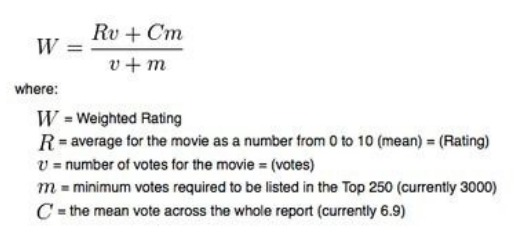

In [71]:
# Calculating the mean vote
C = data['Rating-Mean'].mean()

In [72]:
# Calculating minimum votes requires to be listed in top 5%
m = rating_count.quantile(.95)[0]

In [73]:
# IMDB formula; source: https://tutorialedge.net/python/building-imdb-top-250-clone-pandas/
def weighted_rating(x, m=m, C=C):
  v = x['Rating-Count']
  R = x['Rating-Mean']

  return (v/(v+m) * R) + (m/(m+v) * C)

## **Splitting the Dataset into Two Based on the Explicit and Implicit Ratings**

In [74]:
data_updated = data[data['Book-Rating'] != 0]

In [75]:
print(f'Implicit dataset has {data.shape[0] - data_updated.shape[0]} Observations')
print(f'Explicit dataset has {data_updated.shape[0]} Observations')

Implicit dataset has 644040 Observations
Explicit dataset has 382117 Observations


In [76]:
# Creating relevant dataset
df_top_10 = data_updated.copy().loc[data_updated['Rating-Count'] >= m]
df_top_10.shape

(198178, 12)

In [77]:
df_top_10['Score'] = df_top_10.apply(weighted_rating, axis=1)

In [78]:
df_top_10.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,Age-Bins,Country,Rating-Count,Rating-Mean,Score
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,23,Adult,usa,58,2.9,2.889061
3,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,34,Adult,usa,58,2.9,2.889061
8,50403,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,34,Adult,usa,58,2.9,2.889061
12,63970,034545104X,8,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,34,Adult,usa,58,2.9,2.889061
13,77480,034545104X,8,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,51,Old,usa,58,2.9,2.889061


# **Exploratory Data Analysis**

##1. Ratings Count

### a) Explicit+Implicit Ratings

In [79]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [80]:
rating_count = ratings['Book-Rating'].value_counts().reset_index().sort_values('Book-Rating', ascending = False)

In [81]:
rating_count.head()

,Book-Rating,count
2,10,78610
4,9,67541
1,8,103736
3,7,76457
6,6,36924


Text(0.5, 1.0, 'Ratings Count')

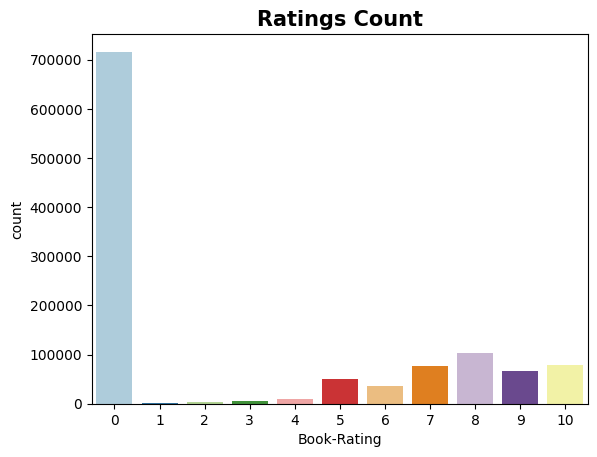

In [82]:
pal = sns.color_palette('Paired')
sns.barplot(x=rating_count['Book-Rating'], y=rating_count['count'], data=rating_count, palette=pal)
plt.title('Ratings Count',fontsize=15,fontweight='bold')

### **Conclusion**: The datset with both explicit and implicit ratings is highly skewed toward the value of zero.

### b) Explicit Ratings

Text(0.5, 1.0, 'Ratings-Density Plot')

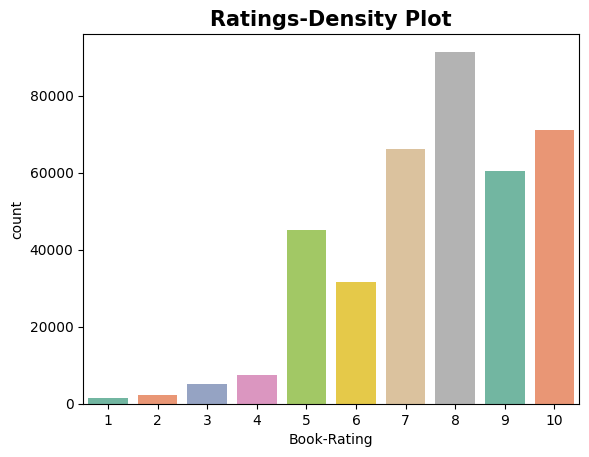

In [83]:
pal = sns.color_palette('Set2')
sns.countplot(x = 'Book-Rating', data=data_updated, palette = pal)
plt.title('Ratings-Density Plot', fontsize = 15, fontweight = 'bold')

### **Conclusion**: The skewness perishes after we remove the implicit ratings.

## 2. Author V/S Ratings

In [84]:
# Ratings count per author
auth_rating = data.groupby(['Book-Author'])['Book-Rating'].count().sort_values(ascending=False).reset_index()

In [85]:
auth_rating.head()

,Book-Author,Book-Rating
0,Stephen King,10009
1,Nora Roberts,8404
2,John Grisham,5991
3,James Patterson,5818
4,Mary Higgins Clark,4751


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Stephen King'),
  Text(1, 0, 'Nora Roberts'),
  Text(2, 0, 'John Grisham'),
  Text(3, 0, 'James Patterson'),
  Text(4, 0, 'Mary Higgins Clark'),
  Text(5, 0, 'Dean R. Koontz'),
  Text(6, 0, 'Tom Clancy'),
  Text(7, 0, 'Danielle Steel'),
  Text(8, 0, 'Sue Grafton'),
  Text(9, 0, 'Janet Evanovich'),
  Text(10, 0, 'Anne Rice')])

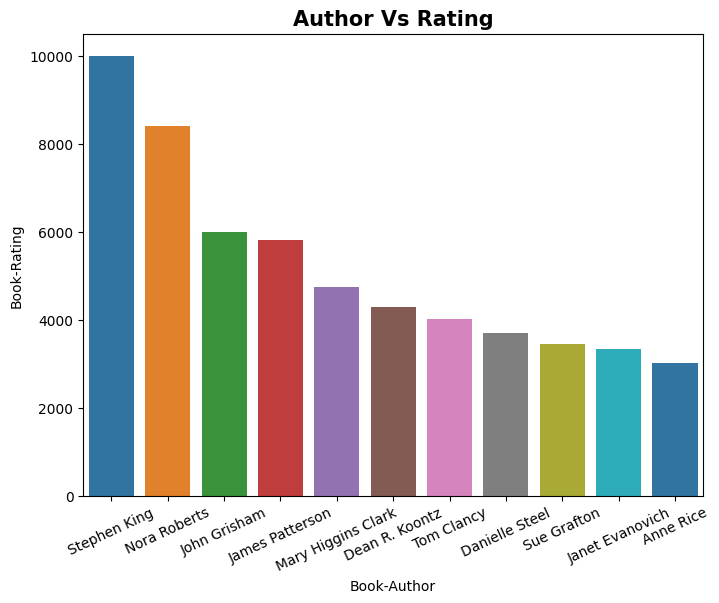

In [86]:
plt.figure(figsize=(8,6))
pal = sns.color_palette()
sns.barplot(x = auth_rating[auth_rating['Book-Rating'] > 3000]['Book-Author'],
            y = auth_rating[auth_rating['Book-Rating'] > 3000]['Book-Rating'],
            data=auth_rating,
            palette = pal)
plt.title('Author Vs Rating', fontsize = 15, fontweight = 'bold')
plt.xticks(rotation = 25)

*   ### Here, we can observe, most frequently rated Authors.
*   ### Most frequently rated author is Nora Roberts, followed by Stephen King.

## 3. Book Ratings Count

In [87]:
# Book ratings count using groupby
book_rating = data.groupby(['Book-Title'])['Book-Rating'].count().sort_values(ascending=False).reset_index()
book_rating.head()

,Book-Title,Book-Rating
0,Wild Animus,2494
1,The Lovely Bones: A Novel,1288
2,The Da Vinci Code,892
3,A Painted House,834
4,The Nanny Diaries: A Novel,823


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000')])

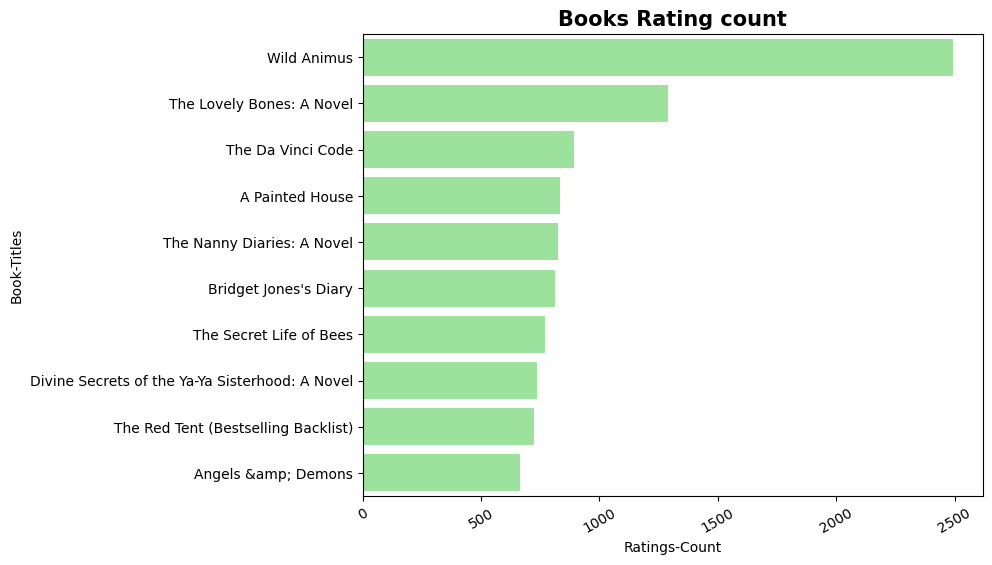

In [88]:
plt.figure(figsize=(8,6))
pal = sns.color_palette('Set2')
sns.barplot(y = book_rating['Book-Title'][:10], x = book_rating['Book-Rating'][:10], data = book_rating,color='lightgreen', orient='h')
plt.title('Books Rating count',fontsize=15,fontweight='bold')
plt.xlabel('Ratings-Count')
plt.ylabel('Book-Titles')
plt.xticks(rotation=30)




*   ### Here, we are able to observe, most frequently rated books by the users.
*   ### Most frequently rated book, happens to be Wild Animus.




## 4. Location

In [89]:
countries = (data['Country'].value_counts()[:10]/len(data['Country']) )*100

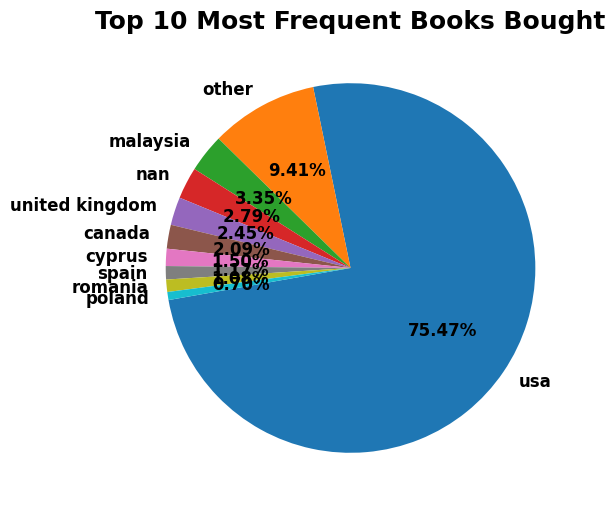

In [90]:
plt.figure(figsize=(6,6))
plt.pie(countries,
        labels = data['Country'].unique()[:10],
        explode=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct = '%.2f%%',
        startangle=190,
        textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':0,
                   'color':'black'})

plt.title("Top 10 Most Frequent Books Bought", fontsize = 18, fontweight = 'bold')
plt.show()



*   ### Most customers are from United states of America, followd by malaysia, United Kingdom.



## 4. Age vs Rating Density


Text(0, 0.5, 'Rating Count')

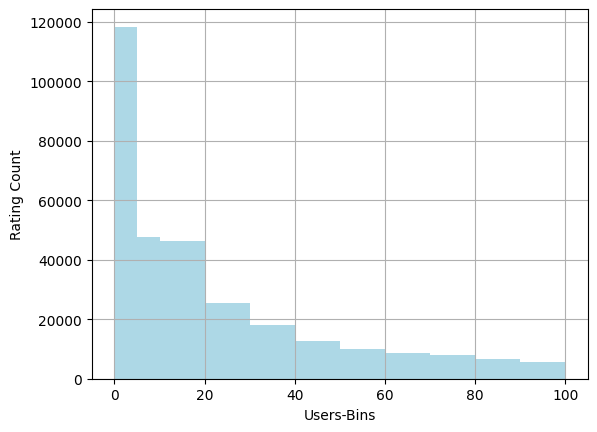

In [91]:
# Visualizing the rating count of users
data_updated['Rating-Count'].hist(bins=[0,5,10,20,30,40,50,60,70,80,90,100],color='lightblue')
plt.xlabel('Users-Bins')
plt.ylabel('Rating Count')

Text(0, 0.5, 'Rating Count')

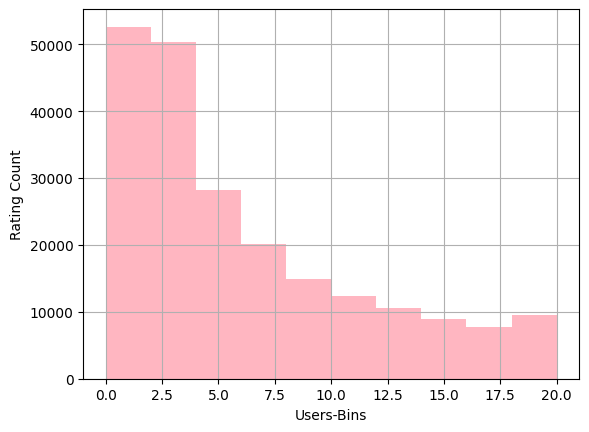

In [92]:
# Rating count of users in range 0-20
data_updated['Rating-Count'].hist(bins=[0,2,4,6,8,10,12,14,16,18,20],color='lightpink')
plt.xlabel('Users-Bins')
plt.ylabel('Rating Count')

## **From this visualization it is evident that most books have been rated by 2 to 5 users only.**

## 5. Age Bin Representation

<Axes: ylabel='Book-Rating'>

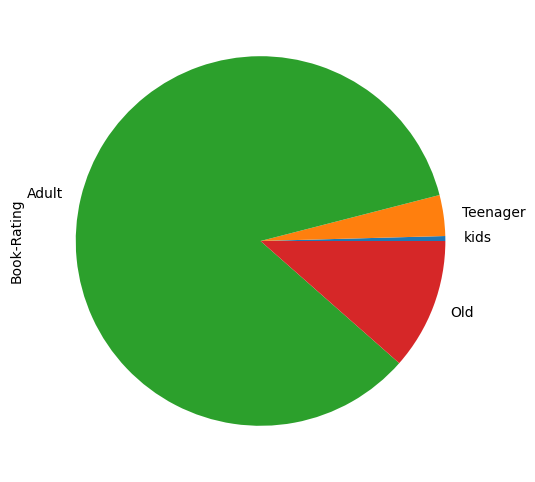

In [93]:
# Visualization of book rating vs age group
plt.figure(figsize=(6,6))
data.groupby('Age-Bins')['Book-Rating'].count().plot(kind='pie')

*   ### Most customers are Adults (20-50yrs).
* ### 2nd most represented age group is for boomers (>50yrs).



In [94]:
# which country rates the books most
b1 = data.groupby('Country')['Book-Rating'].count().sort_values(ascending=False).head(5)

In [95]:
# Implicit ratings i.e. rating=0
b2 = data[data['Book-Rating'] == 0].\
groupby('Country')['Book-Rating'].count().sort_values(ascending=False).head(5)

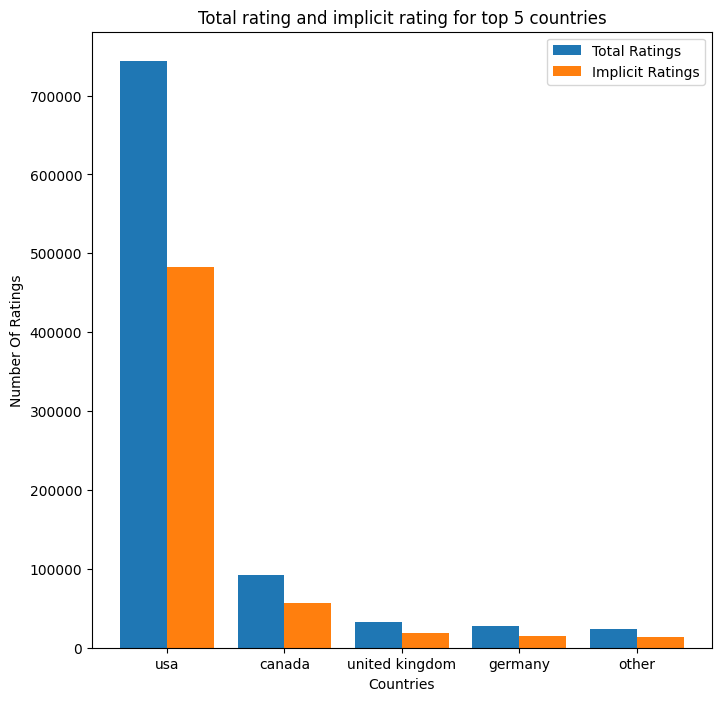

In [96]:
# Bar plot for rating comparison
n = 5
X_axis = np.arange(n)
X = b1.index

plt.figure(figsize = (8,8))
plt.bar(X_axis - 0.2,b1,0.4, label = 'Total Ratings')
plt.bar(X_axis + 0.2, b2, 0.4, label = 'Implicit Ratings')

plt.xticks(X_axis, X)
plt.xlabel('Countries')
plt.ylabel('Number Of Ratings')
plt.title('Total rating and implicit rating for top 5 countries')
plt.legend()
plt.show()

In [97]:
# Most popular books for different age groups
age_bin_df = data.groupby(['Age-Bins','Book-Title'])['Book-Rating'].count().sort_values(ascending=False).reset_index()
age_bin_df.rename(columns = {'Book-Rating': 'Number of times rated'}, inplace=True)
age_bin_df.head()

,Age-Bins,Book-Title,Number of times rated
0,Adult,Wild Animus,1967
1,Adult,The Lovely Bones: A Novel,1124
2,Adult,The Nanny Diaries: A Novel,762
3,Adult,The Da Vinci Code,738
4,Adult,Bridget Jones's Diary,735


### **Note**: Users from each age category can be said to have some similar book preferences, we will later use Age as a relevance to recommend books for implicit ratings.

## 2. Selecting Books with Optimum Number of Ratings

* ### As we all know that building any recommendation system requires a lot of data. Recommendations should be relevant otherwise they can cause a nuisance to the customers.
* ### So, we have set a threshold number of ratings per book in order to get optimal recommendations for our users.

In [98]:
# Counting The ratings as per ISBN
books_reduce = data_updated.groupby(['ISBN'])['Book-Rating'].count().reset_index().sort_values('Book-Rating', ascending=False)
books_reduce.head()

,ISBN,Book-Rating
21856,0316666343,702
117367,0971880107,580
38691,0385504209,485
17979,0312195516,382
4114,0060928336,318


In [99]:
# considering all the counts greater than 10
reduced_books = books_reduce[books_reduce['Book-Rating'] > 10]['ISBN']
reduced_books.head()

21856     0316666343
117367    0971880107
38691     0385504209
17979     0312195516
4114      0060928336
Name: ISBN, dtype: object

In [100]:
# Merging it with original dataset
data_updated = data_updated.merge(reduced_books, how = 'inner', left_on='ISBN', right_on='ISBN')
data_updated.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,Age-Bins,Country,Rating-Count,Rating-Mean
0,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,23,Adult,usa,58,2.9
1,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,34,Adult,usa,58,2.9
2,50403,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,34,Adult,usa,58,2.9
3,63970,034545104X,8,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,34,Adult,usa,58,2.9
4,77480,034545104X,8,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,51,Old,usa,58,2.9


In [101]:
data_updated.shape

(132020, 12)

## 3. Defining the Optimum Book reader

*   ### We can't take every user's rating at facevalue because if the user is a novice reader with only an experience of reading a couple of books, his/her ratings might not be much relevant for finding similarity among books.

* ### Therefore as a general rule of thumb we choosing only those User's who have rated atleast 15 Books for builing the recommendation system.

In [102]:
# Size of dataset rows before the user selection operation
df_size_before_removing_novice_readers = data_updated.shape[0]
df_size_before_removing_novice_readers

132020

In [103]:
# Storing the value count of User-ID in a new variable 'counts1'
counts1 = data_updated['User-ID'].value_counts()

# Removing the user Id which have rated less than 10 books
data_updated = data_updated[data_updated['User-ID'].isin(counts1[counts1 >= 10].index)].reset_index()
data_updated.drop(columns= ['index'], inplace = True)
data_updated.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,Age-Bins,Country,Rating-Count,Rating-Mean
0,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,23,Adult,usa,58,2.9
1,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,34,Adult,usa,58,2.9
2,77480,034545104X,8,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,51,Old,usa,58,2.9
3,98391,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,52,Old,usa,58,2.9
4,115435,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,30,Adult,usa,58,2.9


In [104]:
# data_updated.drop(columns= ['level_0'], inplace = True)

In [105]:
data_updated.shape

(64665, 12)

In [106]:
# size of dataset rows after the user selection operation
df_size_after_removing_novice_readers = data_updated.shape[0]
df_size_after_removing_novice_readers

64665

# **5. Building Models**

## **1. Popularity Based Recommender System**



In [107]:
# Merging books and ratings dataset
ratings_with_name = ratings.merge(books, on='ISBN')
ratings_with_name.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg


In [108]:
# Counting number of rating for each book
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'Num-Rating'}, inplace=True)
num_rating_df.head()

,Book-Title,Num-Rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,1


In [109]:
# Calculating average rating for each book
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating':'Avg-Rating'},inplace=True)
avg_rating_df.head()

,Book-Title,Avg-Rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.00
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,0.00


In [110]:
# Merging Num-Ratings and Avg-Ratings dataframe on Book-Title column
popular_df = num_rating_df.merge(avg_rating_df, on = 'Book-Title')
popular_df

,Book-Title,Num-Rating,Avg-Rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,1,0.000000
...,...,...,...
240981,Ã?Â?lpiraten.,2,0.000000
240982,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
240983,Ã?Â?sterlich leben.,1,7.000000
240984,Ã?Â?stlich der Berge.,3,2.666667


In [111]:
# Sorting top 50 books those who have received more than 250 rating and highest average ratings
popular_df = popular_df[popular_df['Num-Rating'] >= 250].sort_values('Avg-Rating', ascending=False).head(50)
popular_df.head()

,Book-Title,Num-Rating,Avg-Rating
80401,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80389,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80408,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80393,Harry Potter and the Order of the Phoenix (Book 5),347,5.501441
80381,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453


In [112]:
popular_df = popular_df.merge(books, on ='Book-Title')
popular_df.head()

,Book-Title,Num-Rating,Avg-Rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0439136350.01.LZZZZZZZ.jpg
1,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136369,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0439136369.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0439136369.01.LZZZZZZZ.jpg
2,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0786222743,J. K. Rowling,2000,Thorndike Press,http://images.amazon.com/images/P/0786222743.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0786222743.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0786222743.01.LZZZZZZZ.jpg
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0439139597.01.LZZZZZZZ.jpg
4,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139600,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0439139600.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0439139600.01.LZZZZZZZ.jpg


## **2. Collaborative Filtering Based Recommender System (User Based)**

In [113]:
# Selecting users who have given more than 200 ratings
# Merging books and ratings dataframe
ratings_with_name = ratings.merge(books, on ='ISBN')
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
reliable_users = x[x].index
reliable_users

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=811)

In [114]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(reliable_users)]
filtered_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg


In [115]:
# selecting to 50 books with highest number of ratings
y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [116]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
final_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg


In [117]:
# Applying pivot table on final rating dataframe
pt = final_ratings.pivot_table(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating')

In [118]:
pt.fillna(0, inplace=True)
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
# Applying cosine similarity to pivot table
similarity_scores = cosine_similarity(pt)
similarity_scores.shape

(706, 706)

In [120]:
# Building Recommender System
def recommend(book_name):
  # index fetch
  index = np.where(pt.index == book_name)[0][0]
  similar_items = sorted(list(enumerate(similarity_scores[index])), key = lambda x:x[1], reverse = True)[1:5]

  data = []
  for i in similar_items:
    item = []
    temp_df = books[books['Book-Title'] == pt.index[i[0]]]
    item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
    item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
    item.extend(list(temp_df.drop_duplicates('Book-Title')['Year-Of-Publication'].values.astype(int)))
    item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

    data.append(item)

  return data

In [121]:
recommend('Harry Potter and the Order of the Phoenix (Book 5)')

[['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  2000,
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  1999,
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Chamber of Secrets (Book 2)',
  'J. K. Rowling',
  2000,
  'http://images.amazon.com/images/P/0439064872.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  1998,
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg']]

In [122]:
recommend('A Case of Need')

[['Clear and Present Danger (Jack Ryan Novels)',
  'Tom Clancy',
  1996,
  'http://images.amazon.com/images/P/0425122123.01.MZZZZZZZ.jpg'],
 ['Exclusive',
  'Sandra Brown',
  1997,
  'http://images.amazon.com/images/P/0446604232.01.MZZZZZZZ.jpg'],
 ['Harvest',
  'BELVA PLAIN',
  1991,
  'http://images.amazon.com/images/P/0440208912.01.MZZZZZZZ.jpg'],
 ['Mind Prey',
  'John Sandford',
  2004,
  'http://images.amazon.com/images/P/0425152898.01.MZZZZZZZ.jpg']]

## **K-Nearest Neighbours Model**

In [123]:
# Final ratings has top 50 books which has highest ratings and users who rated more than 200 books
final_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg


In [124]:
# Extracting users who have given more than 200 ratings
x = ratings['User-ID'].value_counts() > 200
y = x[x].index  #user_ids
print(y.shape)
ratings = ratings[ratings['User-ID'].isin(y)]

(899,)


In [125]:
# Merging rating dataset with books dataset
rating_with_books = ratings.merge(books, on='ISBN')
rating_with_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg


In [126]:
# Extracting Books which has more than 50 ratings
number_rating = rating_with_books.groupby('Book-Title')['Book-Rating'].count().reset_index()
number_rating.rename(columns= {'Book-Rating':'Number-Of-Ratings'}, inplace=True)
final_rating = rating_with_books.merge(number_rating, on='Book-Title')
final_rating.shape
final_rating = final_rating[final_rating['Number-Of-Ratings'] >= 50]
final_rating.drop_duplicates(['User-ID','Book-Title'], inplace=True)

In [127]:
# Generating Pivot table
book_pivot = final_rating.pivot_table(columns='User-ID', index='Book-Title', values="Book-Rating")
book_pivot.fillna(0, inplace=True)

In [128]:
# Creating csr_matrix
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

In [129]:
from sklearn.neighbors import NearestNeighbors
modelknn = NearestNeighbors(algorithm='brute')
modelknn.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [130]:
#Building recommender system using KNN model

def recommendUsingKNN(user_id):

  modelknn = NearestNeighbors(algorithm='brute')
  modelknn.fit(book_sparse)

  distances, suggestions = modelknn.kneighbors(book_pivot.iloc[user_id, :].values.reshape(1, -1))

  for i in range(len(suggestions)):
    item = book_pivot.index[suggestions[i]]

  recommendation = []
  for j in range(len(item)):
    temp_df1 = final_rating[final_rating['Book-Title'] == item[j]].head()
    recommendation.extend(list(temp_df1.drop_duplicates('Book-Title')['Book-Title'].values))
    recommendation.extend(list(temp_df1.drop_duplicates('Book-Title')['Book-Author'].values))
    recommendation.extend(list(temp_df1.drop_duplicates('Book-Title')['Year-Of-Publication'].values.astype(int)))
    recommendation.extend(list(temp_df1.drop_duplicates('Book-Title')['Image-URL-M'].values))
  return recommendation

In [131]:
recommendUsingKNN(230)

['Granny Dan',
 'DANIELLE STEEL',
 2000,
 'http://images.amazon.com/images/P/0440224829.01.MZZZZZZZ.jpg',
 'Exclusive',
 'Sandra Brown',
 1997,
 'http://images.amazon.com/images/P/0446604232.01.MZZZZZZZ.jpg',
 'The Reef',
 'Nora Roberts',
 1999,
 'http://images.amazon.com/images/P/051512608X.01.MZZZZZZZ.jpg',
 'The Most Wanted',
 'Jacquelyn Mitchard',
 1999,
 'http://images.amazon.com/images/P/0451196856.01.MZZZZZZZ.jpg',
 'Table For Two',
 'Nora Roberts',
 2002,
 'http://images.amazon.com/images/P/0373218400.01.MZZZZZZZ.jpg']

# **Exporting Data through pickle for creating webpage**

In [132]:
import pickle
pickle.dump(popular_df,open('popular.pkl', 'wb'))

In [133]:
# Exporting data for webpage
pickle.dump(pt, open('pt.pkl', 'wb'))
pickle.dump(books, open('books.pkl','wb'))
pickle.dump(similarity_scores, open('similarity_scores.pkl', 'wb'))

Refrences:-

https://www.analyticsvidhya.com/blog/2021/06/build-book-recommendation-system-unsupervised-learning-project/